# 📝 Pattern Recognition & Biometrics. TP Apprentissage profond ou *Deep Learning*

Par Omar Galarraga et Sonia Garcia

Dans ce travail pratique, nous verrons l'intérêt des modèles d'apprentissage profond (*Deep Learning*) en les comparant à des modèles de *Machine Learning* classiques (non profonds).  

Nous voudrons identifier les animaux et les objets à partir des images de la base de données CIFAR 10 (https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Commençons par charger les données...


In [2]:
import tensorflow as tf


A manière d'exemple, nous afficherons 3 images de chaque classe :

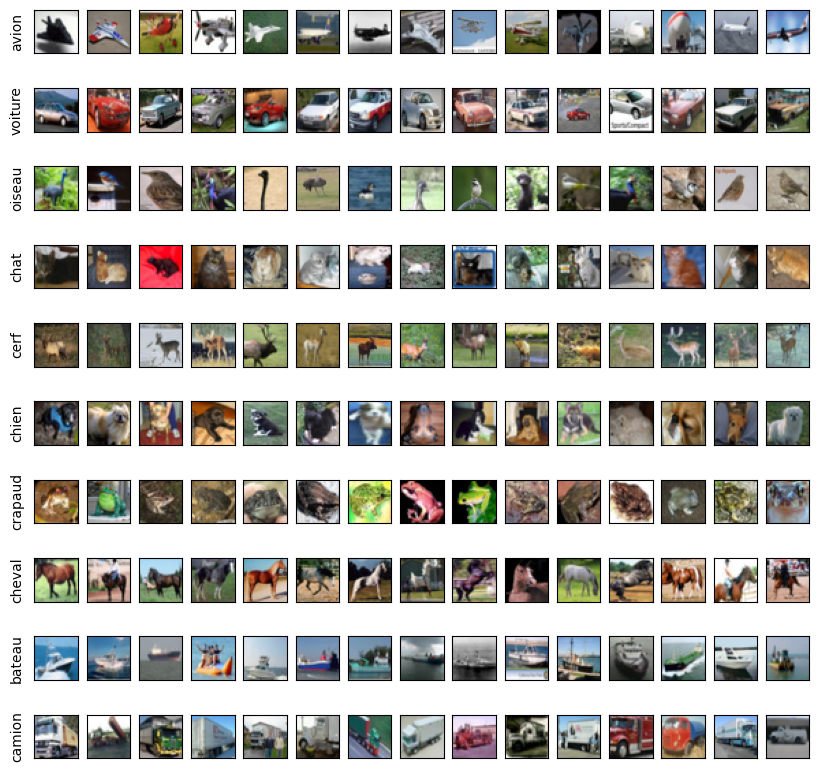

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [3]:
from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

(data_train, target_train), (data_test, target_test) = tf.keras.datasets.cifar10.load_data()

import matplotlib.pyplot as plt
import numpy as np
classes = ['avion', 'voiture', 'oiseau', 'chat', 'cerf', 
            'chien', 'crapaud', 'cheval', 'bateau', 'camion']

# Normalisation des valeurs des pixels entre 0 and 1
data_train, data_test = data_train / 255.0, data_test / 255.0

n_images = 15

plt.figure(figsize=(10,10))
for i in range(len(classes)):
  idx = np.where(target_train == i)
  #print(idx)
  for j in range(n_images): 
    plt.subplot(len(classes),n_images,n_images*i+j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data_train[idx[0][j]])
    if j == 0:
        plt.ylabel(classes[target_train[idx[0][j]][0]])
plt.show()


print(target_train)



## Partie I. *Feedforward Neural Network* à une seule couche cachée

Nous construisons un réseau de neurones avec $N_{H_l} = 1$ couche cachée et $m=32$ neurones dans la couche cachée. 

* I.1) Si on considère les images "brutes", quelle est la dimension de la "couche" d'entrée ?

La taille de la photo 32 x 32 x 3
* I.2) Quelle est la performance du modèle sur les ensembles d'apprentissage et de test ?

0.47 dans le dernier epoch

In [4]:
m=32
refmodel = tf.keras.Sequential()
refmodel.add(Flatten(input_shape=data_train[0].shape))
refmodel.add(Dense(m, activation='sigmoid'))
refmodel.add(Dense(len(classes)))

refmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = refmodel.fit(data_train, target_train, epochs=20, 
                        validation_data=(data_test, target_test), batch_size=64)

Epoch 1/20
782/782 [==============================] - 1s 1ms/step - loss: 1.9424 - accuracy: 0.3125 - val_loss: 1.8181 - val_accuracy: 0.3649
Epoch 2/20
782/782 [==============================] - 1s 1ms/step - loss: 1.7850 - accuracy: 0.3742 - val_loss: 1.7453 - val_accuracy: 0.3855
Epoch 3/20
782/782 [==============================] - 1s 1ms/step - loss: 1.7327 - accuracy: 0.3904 - val_loss: 1.7264 - val_accuracy: 0.3918
Epoch 4/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6973 - accuracy: 0.4031 - val_loss: 1.6985 - val_accuracy: 0.3974
Epoch 5/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6679 - accuracy: 0.4137 - val_loss: 1.6684 - val_accuracy: 0.4056
Epoch 6/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6451 - accuracy: 0.4177 - val_loss: 1.6968 - val_accuracy: 0.4073
Epoch 7/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6231 - accuracy: 0.4266 - val_loss: 1.6428 - val_accuracy: 0.4185
Epoch 

Optimisez le nombre de neurones dans la couche cachée dans l'intervalle $m = \left[2,128\right]$
* I.3) Quelle est la valeur optimale de $ m $ ?
* I.4) Quelles sont les nouvelles performances en apprentissage et en test ?

Train : 0.5006

Test : 0.462

In [11]:


def create_model(neurons):
    model = Sequential()
    model.add(Flatten(input_shape=data_train[0].shape))
    model.add(Dense(neurons, activation='sigmoid'))
    model.add(Dense(len(classes)))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

def train_model(model, epochs = 20, batch_size = 64):
    return model.fit(data_train, target_train, epochs=epochs, 
                        validation_data=(data_test, target_test), batch_size = batch_size)

def find_best_neurons(start = 40, end = 50):
    best_neurons = 0
    best_accuracy = 0
    for neurons in range(start, end+1):
        model = create_model(neurons)
        history = train_model(model)
        accuracy = history.history['val_accuracy'][-1]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_neurons = neurons
        print(neurons, accuracy)
    return best_neurons, best_accuracy, model



# On a pas pu faire les tests de 2 à 128 par manque de puissance de calcul avec le CPU seulement

In [29]:
best_neurons, best_accuracy, model = find_best_neurons(32,64)
print(f"Best number of neurons: {best_neurons} with accuracy: {best_accuracy}")

Epoch 1/20
782/782 [==============================] - 2s 2ms/step - loss: 1.9360 - accuracy: 0.3102 - val_loss: 1.8201 - val_accuracy: 0.3596
Epoch 2/20
782/782 [==============================] - 1s 2ms/step - loss: 1.7838 - accuracy: 0.3709 - val_loss: 1.7666 - val_accuracy: 0.3773
Epoch 3/20
782/782 [==============================] - 1s 1ms/step - loss: 1.7258 - accuracy: 0.3900 - val_loss: 1.7014 - val_accuracy: 0.3975
Epoch 4/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6909 - accuracy: 0.4050 - val_loss: 1.6878 - val_accuracy: 0.3972
Epoch 5/20
782/782 [==============================] - 1s 2ms/step - loss: 1.6618 - accuracy: 0.4119 - val_loss: 1.6392 - val_accuracy: 0.4200
Epoch 6/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6411 - accuracy: 0.4194 - val_loss: 1.6620 - val_accuracy: 0.4067
Epoch 7/20
782/782 [==============================] - 1s 1ms/step - loss: 1.6138 - accuracy: 0.4311 - val_loss: 1.6254 - val_accuracy: 0.4251
Epoch 

Montrez la matrice de confusion du modèle optimal sur l'ensemble de test

* I.4) Quelle est la prédiction "préférée" du modèle ?

La classe 3 donc la classe chat
* I.5) Quelle est la classe la mieux prédite ? Justifiez brièvement

C'est la classe 8 donc bateau avec la meilleure précision (une prédiction correcte = élément diagonal) puis on divise par la somme des éléments sur la colonne pour avoir la précision

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(data_test), axis=1)
conf_matrix = confusion_matrix(target_test, y_pred)
print(conf_matrix)

preferred_class = np.argmax(conf_matrix.sum(axis=0))
print("Classe la plus fréquemment prédite:", preferred_class)

diagonal = conf_matrix.diagonal()
column_sums = conf_matrix.sum(axis=0)
precision_per_class = diagonal / column_sums
best_predicted_class = np.argmax(precision_per_class)
print("Classe avec la meilleure précision:", best_predicted_class)

313/313 [==============================] - 0s 845us/step
[[590  23  61  62  28  16  24  45 107  44]
 [ 78 498  14  52  13  33  18  40  63 191]
 [103  16 315 149  97  84 110  93  14  19]
 [ 40  15  68 448  25 159 128  54  17  46]
 [ 69   8 147 119 325  65 127 109  16  15]
 [ 29  18  73 303  41 332  85  81  20  18]
 [ 14  16  84 178  85  65 495  31  15  17]
 [ 55  12  54 106  69  91  35 522  13  43]
 [189  50  13  47  18  28  12  18 555  70]
 [ 84 138   5  64   6  25  28  49  62 539]]
Classe la plus fréquemment prédite: 3
Classe avec la meilleure précision: 8


## Partie II. *Feedforward Neural Networks* à plusieurs couches

Construisez et entraînez un réseau de neurones type Perceptron Multicouche (PMC) à $N_{H_l} = 3$ couches cachées et avec $m_1=32, m_2=16, m_3 = 16$ neurones respectivement pour les couches cachées 1, 2 et 3.

* II.1) Combien de paramètres sont-ils optimisés au total ? 

• couche 1: 

32x 32 x 3 x 32 + 32 = 98336

•couche 2:

 32 x 16 + 16 = 528

• couche 3:

16 x 16  + 16 = 272

Total = 99136

* II.2) Quelle est la performance en apprentissage et validation ?

0.3911 et 0.3729 respectivement pas terrible
* II.3) Montrez la matrice de confusion

voir un peu plus bas

In [15]:
N_layers = 3
neurons_layout = (32, 16, 16)

def build_pmc(N_layers = N_layers, neurons_layout = neurons_layout):
    model = Sequential()
    model.add(Flatten(input_shape=data_train[0].shape))
    for i in range(N_layers):
        model.add(Dense(neurons_layout[i], activation='sigmoid'))
    model.add(Dense(len(classes)))
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model

model = build_pmc()

history1 = model.fit(data_train, target_train, epochs=20, validation_split=0.2, batch_size=64)
test_loss, test_acc = model.evaluate(data_test, target_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')


Epoch 1/20
625/625 [==============================] - 1s 1ms/step - loss: 2.2065 - accuracy: 0.1561 - val_loss: 2.0733 - val_accuracy: 0.1917
Epoch 2/20
625/625 [==============================] - 1s 1ms/step - loss: 2.0368 - accuracy: 0.2169 - val_loss: 2.0055 - val_accuracy: 0.2402
Epoch 3/20
625/625 [==============================] - 1s 1ms/step - loss: 1.9689 - accuracy: 0.2456 - val_loss: 1.9588 - val_accuracy: 0.2425
Epoch 4/20
625/625 [==============================] - 1s 1ms/step - loss: 1.9275 - accuracy: 0.2646 - val_loss: 1.9304 - val_accuracy: 0.2612
Epoch 5/20
625/625 [==============================] - 1s 1ms/step - loss: 1.9009 - accuracy: 0.2760 - val_loss: 1.9192 - val_accuracy: 0.2694
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 1.8807 - accuracy: 0.2939 - val_loss: 1.9039 - val_accuracy: 0.2933
Epoch 7/20
625/625 [==============================] - 1s 1ms/step - loss: 1.8655 - accuracy: 0.3049 - val_loss: 1.8862 - val_accuracy: 0.2921
Epoch 

In [18]:
y_pred = np.argmax(model.predict(data_test), axis=1)
conf_matrix = confusion_matrix(target_test, y_pred)
print(conf_matrix)

total_params = model.count_params()
print(f'Total number of parameters: {total_params}')

313/313 [==============================] - 0s 548us/step
[[441  33  82  29  27  24  29 119 149  67]
 [ 35 398  12  36   5  44  45  55  94 276]
 [117  27 130  45 229  78 172 167  16  19]
 [ 34  37  76  89  66 265 210 148  13  62]
 [ 54  10  81  21 259  72 192 273  13  25]
 [ 35  32  63  75  85 340 145 188  12  25]
 [ 10  15  57  55 119  58 576  83   4  23]
 [ 41  14  31  33  74  66  57 602   7  75]
 [252 120  24  13   5  37  14  36 382 117]
 [ 45 149  10  29   7  16  44 105  83 512]]
Total number of parameters: 99306


## Partie III. Réseaux de neurones convolutionnels (*CNN*)


Créez un CNN à l'image de *LeNet-5* (LeCun et al., 1998), qui consiste en une double alternance entre une couche convolutionnelle ($m=32$, kernel de $5x5$) et une couche de *Maximum Pooling* (kernel de $2x2$), suivie d'une couche dense ($m=64$).

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def make_cnn_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation='relu'))
    cnn_model.add(Dense(len(classes), activation='softmax'))
    return cnn_model

cnn_model = make_cnn_model()

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnn_model.summary()
history3= train_model(cnn_model)

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_94 (Flatten)        (None, 800)               0         
                                                                 
 dense_190 (Dense)           (None, 64)              

c:\Users\Skander\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 [==============================] - 13s 16ms/step - loss: 1.5688 - accuracy: 0.4323 - val_loss: 1.4223 - val_accuracy: 0.4920
Epoch 2/20
782/782 [==============================] - 12s 16ms/step - loss: 1.2782 - accuracy: 0.5452 - val_loss: 1.1954 - val_accuracy: 0.5789
Epoch 3/20
782/782 [==============================] - 12s 16ms/step - loss: 1.1441 - accuracy: 0.5979 - val_loss: 1.0929 - val_accuracy: 0.6111
Epoch 4/20
782/782 [==============================] - 13s 17ms/step - loss: 1.0499 - accuracy: 0.6310 - val_loss: 1.0756 - val_accuracy: 0.6185
Epoch 5/20
782/782 [==============================] - 14s 19ms/step - loss: 0.9899 - accuracy: 0.6554 - val_loss: 1.0478 - val_accuracy: 0.6335
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 0.9360 - accuracy: 0.6745 - val_loss: 1.0330 - val_accuracy: 0.6366
Epoch 7/20
782/782 [==============================] - 12s 16ms/step - loss: 0.8964 - accuracy: 0.6863 - val_loss: 1.0094 - val_accuracy: 0.6475
Epo


* III.1) Combien de paramètres arrivent-ils en entrée de la couche dense ?

• après la 1ère couche: 32-5+1=28

• après la 2ème couche: 28/2=14

• après la 3ème couche: 14-5+1=10

• après la 4ème couche: 10/2= 5
donc on aura m x 5 x 5 = 800 paramètres en entrée
* III.2) Combien de paramètres sont-ils entraînés au total ?

800 x 64 + 64 = 51264
* III.3) Quelle est la performance d'apprentissage et de validation ?

0.7981 en apprentissage
0.6854 en validation

In [27]:
best_acc = max(history3.history['accuracy'])
test_acc = cnn_model.evaluate(data_test, target_test)[1]
print(f'Best accuracy: {best_acc*100:.2f}%')
print(f'Validation accuracy: {test_acc*100:.2f}%')


313/313 [==============================] - 1s 4ms/step - loss: 0.9841 - accuracy: 0.6854
Best accuracy: 79.81%
Validation accuracy: 68.54%


## Partie IV. Transfer learning

Avec l'immense progression récente du Deep Learning, il est souvent plus intéressant de créer un modèle à partir d'un autre modèle déjà entraîné et l'ajuster (*fine-tune*) selon la tâche spécifique que l'on veut réaliser. Actuellement un large catalogue de modèles très complexes entraînés sur des bases de données de très grande taille est à disposition du public général.   

Commençons par créer un réseau type *ResNet-18* (He et al., 2015) pré-entraîné sur la base de données *ImageNet*

In [23]:
#import torch 
from tensorflow.keras.applications import ResNet50

#resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True) 

ResNet50_model = ResNet50(
    include_top=False, 
    weights='imagenet', 
    input_shape= (32, 32, 3),
    pooling='avg')

tl_cnn = Sequential()
tl_cnn.add(ResNet50_model)
tl_cnn.add(Flatten())
tl_cnn.add(Dense(10, activation='softmax'))
tl_cnn.summary()

94765736/94765736 [==============================] - 2s 0us/step
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_95 (Flatten)        (None, 2048)              0         
                                                                 
 dense_192 (Dense)           (None, 10)                20490     
                                                                 
Total params: 23608202 (90.06 MB)
Trainable params: 23555082 (89.86 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


Maintenant on ajuste le modèle pré-entraîné à notre problème spécifique (*fine-tuning*) 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)

On a pas pu le faire pas possible d'utiliser le GPU sur tensorflow,on a réduit à 10 le nombre d'epochs

In [28]:
tl_cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history4 = tl_cnn.fit(data_train, target_train, epochs=10, validation_data=(data_test, target_test))

Epoch 1/10


c:\Users\Skander\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 647s 409ms/step - loss: 1.8319 - accuracy: 0.4375 - val_loss: 1.4968 - val_accuracy: 0.4683
Epoch 2/10


KeyboardInterrupt: 

Remplissez le tableau ci-dessous selon les différentes méthodes de classification testées.

| Classifieur        | Perf Apprentissage | Perf Test | 
|--------------------|--------------------|-----------|
| *FNN* simple       | 0.5006 | 0.462 |  
| *FNN* profond      |  0.3911| 0.3729 | 
| *CNN*              | 0.7981 | 0.6854  | 
| *ResNet50*         |  |  | 

* IV.1) Quel est le meilleur classifieur ? Justifiez


IV.2) Pendant quelques années les modèles ResNet ont été le *silver standard* dans la classification d'images. Plus récemment, une autre famille de modèles appelée *ConvNet* (Liu et al., 2022) a montré des meilleures performances. Refaite l'expérience précédente en partant d'un modèle *ConvNet* pré-entraîné. 
(Il est préférable d'utiliser un GPU. Par exemple, Google Colab, Codesphere, Gradient by Paperspace, Kaggle, proposent des GPU gratuitement)  

In [ ]:
#Ecrivez votre code ici